#### import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

#### Create and plot Datasets

In [2]:
class Dataset:
    def __init__(self, path):
        self.data = pd.read_csv(path)
        self.data_attr = self.data[['x', 'y']].to_numpy()
        self.data_labels = self.data['label'].to_numpy()
        self.data_c1 = self.data[self.data_labels==0].to_numpy()
        self.data_c2 = self.data[self.data_labels==1].to_numpy()

    def plot(self, title):
        plt.scatter(self.data_c1[:,0], self.data_c1[:,1], c='red', s=3)
        plt.scatter(self.data_c2[:,0], self.data_c2[:,1], c='blue', s=3)
        plt.ylabel('y')
        plt.xlabel('x')
        plt.title(title)
        plt.show()

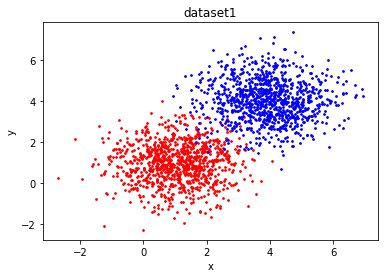

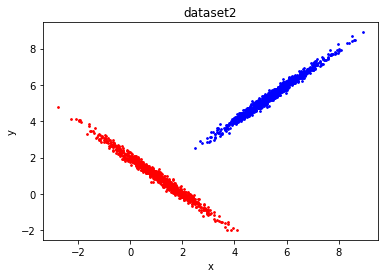

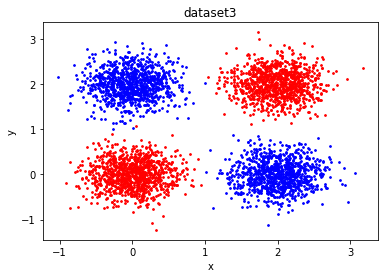

In [3]:
dataset1 = Dataset('dataset1.csv')
dataset1.plot('dataset1')

dataset2 = Dataset('dataset2.csv')
dataset2.plot('dataset2')

dataset3 = Dataset('dataset3.csv')
dataset3.plot('dataset3')

#### Create Perceptron model

In [219]:
class Perceptron:
    
    def __init__(self, num_neuron, degree):
        self.degree = degree
        self.activation = lambda x: (x>0).astype(int)
        self.step_size_for_acc = 100
        if self.degree == 1:
             self.W = np.zeros((3, 1))
        elif self.degree == 2:
             self.W = np.zeros((6, 1))
        else:
            print('Just degree 1 or 2 is supported!')
    
    def set_data(self, dataset, split_frac):
        self.dataset = dataset
        data = dataset.data_attr
        new_data = np.ones(data.shape[0])
        for col in range(data.shape[1]):
            for deg in range(1, self.degree+1):
                new_data = np.c_[new_data, data[:, col]**deg]
            if self.degree != 1:
                for col2 in range(col+1, data.shape[1]):
                    new_data = np.c_[new_data, data[:, col]*data[:, col2]]
        data = new_data
        labels = dataset.data_labels
        ziped_data = np.c_[data, labels]
        np.random.seed(123)
        np.random.shuffle(ziped_data)
        data = ziped_data[:,:-1]
        labels = ziped_data[:,-1] 
        self.train_data = data[:int(data.shape[0]*split_frac)]
        self.val_data = data[int(data.shape[0]*split_frac):]
        self.train_labels = labels[:int(data.shape[0]*split_frac)]
        self.val_labels = labels[int(data.shape[0]*split_frac):]
    
    def plot_boundary(self, plot_data=True):
        min_x1 = math.floor(min(self.dataset.data_attr[:,0]))
        max_x1 = math.ceil(max(self.dataset.data_attr[:,0]))
        min_x2 = math.floor(min(self.dataset.data_attr[:,1]))
        max_x2 = math.ceil(max(self.dataset.data_attr[:,1]))
        boundary_x1, boundary_x2 = [], []
        for x1 in np.arange(min_x1, max_x1, (max_x1-min_x1)/500):
            for x2 in np.arange(min_x2, max_x2, (max_x2-min_x2)/500): 
                sample = [1]
                for deg in range(1, self.degree+1):
                    sample.append(x1**deg)
                if self.degree != 1:
                    sample.append(x1*x2)
                for deg in range(1, self.degree+1):
                    sample.append(x2**deg)
                sample = np.array(sample)
                y = sample @ self.W
                if abs(y)<(0.05*(self.degree)):
                    boundary_x1.append(x1)
                    boundary_x2.append(x2)             
            
        plt.scatter(self.dataset.data_c1[:,0], self.dataset.data_c1[:,1], c='red', s=3)
        plt.scatter(self.dataset.data_c2[:,0], self.dataset.data_c2[:,1], c='blue', s=3)
        plt.scatter(boundary_x1, boundary_x2, c='orange', s=5)
        plt.ylabel('y')
        plt.xlabel('x')
        plt.title('data and boundary')
        plt.legend(["class 1", "class 2", "boundary"])
        plt.show()
     
    def plot_accuracy(self):
        plt.plot(self.all_train_acc)
        plt.plot(self.all_val_acc)
        plt.title('accuracy in train and validation')
        plt.ylabel('accuracy')
        plt.xlabel('steps ({} samples per)'.format(self.step_size_for_acc))
        plt.legend(["train", "val"])
        plt.show()
        
    def infer(self, x):
        y_hat = x @ self.W
        y_hat = self.activation(y_hat)
        return y_hat
            
    def get_accuracy(self):
        Y_hat = self.train_data @ self.W
        preds = self.activation(Y_hat)
        train_accurace = ((preds.T==self.train_labels).sum() / preds.shape[0])
        Y_hat = self.val_data @ self.W
        preds = self.activation(Y_hat)
        val_accurace = ((preds.T==self.val_labels).sum() / preds.shape[0])
        return train_accurace, val_accurace
        
        
        
    def train(self, num_epoches):
        self.all_val_acc, self.all_train_acc = [], []
        for n_epoch in range(1, num_epoches+1):
            for i in range(self.train_data.shape[0]):
                x = self.train_data[i]
                y = self.train_labels[i]
                y_hat = self.infer(x)
                alpha = 1/np.linalg.norm(x)
                update_W = (alpha*(y-y_hat)*x).T.reshape((self.W.shape))
                self.W = np.add(self.W, update_W)
                if (i+1) % self.step_size_for_acc == 0:  
                    train_accurace, val_accurace = self.get_accuracy()
                    self.all_train_acc.append(train_accurace)
                    self.all_val_acc.append(val_accurace)
                

#### dataset1 and degree 1 in perceptron

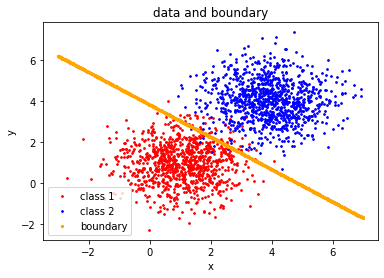

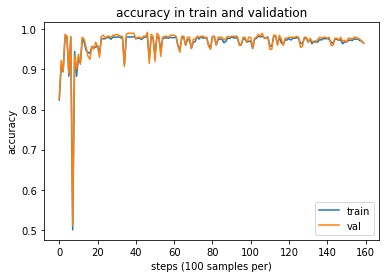

In [220]:
p = Perceptron(num_neuron=2, degree=1)
p.set_data(dataset1, split_frac=0.8)
p.train(num_epoches=10)
p.plot_boundary()
p.plot_accuracy()

#### dataset2 and degree 1 in perceptron

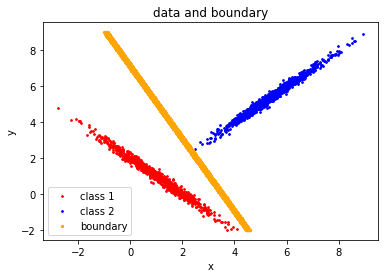

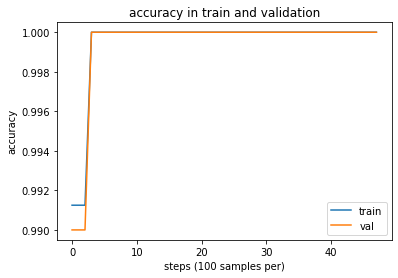

In [221]:
p = Perceptron(num_neuron=2, degree=1)
p.set_data(dataset2, split_frac=0.8)
p.train(num_epoches=3)
p.plot_boundary()
p.plot_accuracy()

#### dataset3 and degree 2 in perceptron

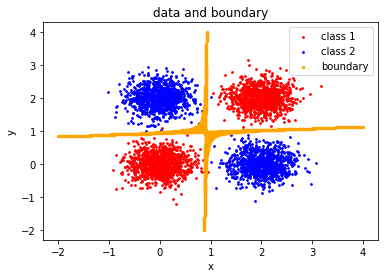

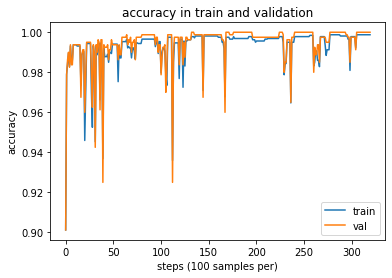

In [222]:
p = Perceptron(num_neuron=2, degree=2)
p.set_data(dataset3, split_frac=0.8)
p.train(num_epoches=10)
p.plot_boundary()
p.plot_accuracy()

#### Create Adaline model

In [184]:
class Adaline:
    
    def __init__(self, num_neuron, degree):
        self.degree = degree
        self.activation = lambda x: np.sign(x)
        self.step_size_for_acc = 100
        if self.degree == 1:
             self.W = np.ones((3, 1))
        elif self.degree == 2:
             self.W = np.ones((6, 1))
        else:
            print('Just degree 1 or 2 is supported!')
    
    def set_data(self, dataset, split_frac):
        self.dataset = dataset
        data = dataset.data_attr
        new_data = np.ones(data.shape[0])
        for col in range(data.shape[1]):
            for deg in range(1, self.degree+1):
                new_data = np.c_[new_data, data[:, col]**deg]
            if self.degree != 1:
                for col2 in range(col+1, data.shape[1]):
                    new_data = np.c_[new_data, data[:, col]*data[:, col2]]
        data = new_data
        
        labels = dataset.data_labels
        labels = (-1)**(~labels.astype(bool)).astype(int)  ## in Adaline labels must be +1 and -1
        ziped_data = np.c_[data, labels]
        np.random.seed(123)
        np.random.shuffle(ziped_data)
        data = ziped_data[:,:-1]
        labels = ziped_data[:,-1] 
        self.train_data = data[:int(data.shape[0]*split_frac)]
        self.val_data = data[int(data.shape[0]*split_frac):]
        self.train_labels = labels[:int(data.shape[0]*split_frac)]
        self.val_labels = labels[int(data.shape[0]*split_frac):]
            
    def plot_boundary(self, plot_data=True):
        min_x1 = math.floor(min(self.dataset.data_attr[:,0]))
        max_x1 = math.ceil(max(self.dataset.data_attr[:,0]))
        min_x2 = math.floor(min(self.dataset.data_attr[:,1]))
        max_x2 = math.ceil(max(self.dataset.data_attr[:,1]))
        boundary_x1, boundary_x2 = [], []
        for x1 in np.arange(min_x1, max_x1, (max_x1-min_x1)/500):
            for x2 in np.arange(min_x2, max_x2, (max_x2-min_x2)/500): 
                sample = [1]
                for deg in range(1, self.degree+1):
                    sample.append(x1**deg)
                if self.degree != 1:
                    sample.append(x1*x2)
                for deg in range(1, self.degree+1):
                    sample.append(x2**deg)

                sample = np.array(sample)
                y_hat, _ = self.infer(sample)
                if abs(y_hat)<(0.1/(self.degree*5)):
                    boundary_x1.append(x1)
                    boundary_x2.append(x2)             
            
        plt.scatter(self.dataset.data_c1[:,0], self.dataset.data_c1[:,1], c='red', s=3)
        plt.scatter(self.dataset.data_c2[:,0], self.dataset.data_c2[:,1], c='blue', s=3)
        plt.scatter(boundary_x1, boundary_x2, c='orange', s=5)
        plt.ylabel('y')
        plt.xlabel('x')
        plt.title('data and boundary')
        plt.legend(["class 1", "class 2", "boundary"])
        plt.show()
     
    def plot_accuracy(self):
        plt.plot(self.all_train_acc)
        plt.plot(self.all_val_acc)
        plt.title('accuracy in train and validation')
        plt.ylabel('accuracy')
        plt.xlabel('steps ({} samples per)'.format(self.step_size_for_acc))
        plt.legend(["train", "val"])
        plt.show()
        
    def infer(self, x):
        y_hat = x @ self.W
        preds = self.activation(y_hat)
        return y_hat, preds
            
    def get_accuracy(self):
        Y_hat, preds = self.infer(self.train_data)
        train_accurace = ((preds.T==self.train_labels).sum() / preds.shape[0])
        Y_hat, preds = self.infer(self.val_data)
        val_accurace = ((preds.T==self.val_labels).sum() / preds.shape[0])
        return train_accurace, val_accurace
        
        
        
    def train(self, num_epoches):
        self.all_val_acc, self.all_train_acc = [], []
        for n_epoch in range(1, num_epoches+1):
            for i in range(self.train_data.shape[0]):
                x = self.train_data[i]
                y = self.train_labels[i]
                y_hat, _ = self.infer(x)
                alpha = 1/100
                update_W = (alpha*(y-y_hat)*x).T.reshape((self.W.shape))
                self.W = np.add(self.W, update_W)
                if (i+1) % self.step_size_for_acc == 0:  
                    train_accurace, val_accurace = self.get_accuracy()
                    self.all_train_acc.append(train_accurace)
                    self.all_val_acc.append(val_accurace)
                

#### dataset1 and degree 1 in Adaline

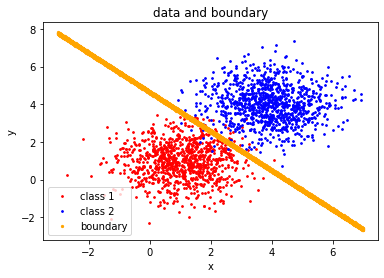

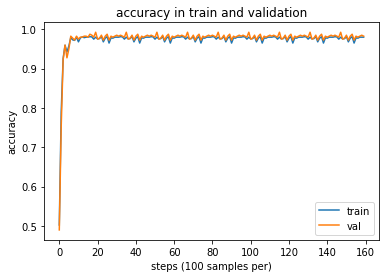

In [185]:
adaline = Adaline(num_neuron=2, degree=1)
adaline.set_data(dataset1, split_frac=0.8)
adaline.train(num_epoches=10)
adaline.plot_boundary()
adaline.plot_accuracy()

#### dataset2 and degree 1 in Adaline

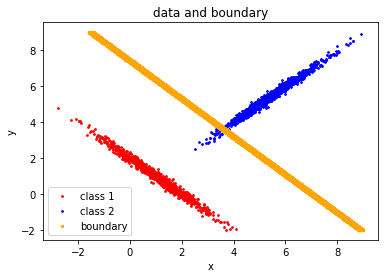

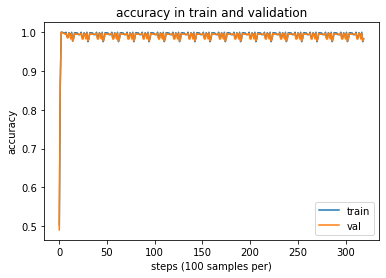

In [187]:
adaline = Adaline(num_neuron=2, degree=1)
adaline.set_data(dataset2, split_frac=0.8)
adaline.train(num_epoches=20)
adaline.plot_boundary()
adaline.plot_accuracy()

#### dataset2 and degree 2 in Adaline

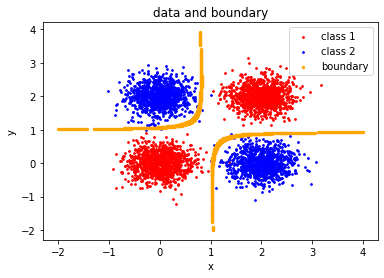

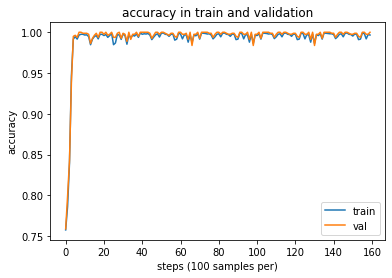

In [189]:
adaline = Adaline(num_neuron=2, degree=2)
adaline.set_data(dataset3, split_frac=0.8)
adaline.train(num_epoches=5)
adaline.plot_boundary()
adaline.plot_accuracy()